# Model 1: handpicked features, outliers left in

This model (logistic regression) uses features that have been handpicked based on their Pearson's Product Moment Coefficients with diagnosis shown in the correltaion matrix (in my notebook Amber_data_exploration).

These are as follows, in descending order:
* concave points_worst, 0.79
* concave points_mean, 0.78
* radius_worst, 0.78
* perimeter_worst, 0.78
* area_worst, 0.78
* perimeter_mean, 0.74
* area_mean, 0.71
* radius_mean, 0.73
* concavity_mean, 0.7

The rest of the features have been dropped as they were not strongly correlated to diagnosis.

In [1]:
# load in the relevant libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load in the csv file created in the notebook Amber_data_exploration which only contains the features of interest
handpicked_predictors = pd.read_csv("C:/Users/alsaw/OneDrive/Documents/2019-20 post India/Coding/CFG - python/Final Project/Team2_final_project/Data/Interim/handpicked_predictors.csv")

In [3]:
# check it worked
handpicked_predictors.head()

,Unnamed: 0,one_hot_diagnosis,concave points_worst,concave points_mean,radius_worst,perimeter_worst,area_worst,perimeter_mean,area_mean,radius_mean,concavity_mean
0,0,1,0.2654,0.14710,25.38,184.60,2019.0,122.80,1001.0,17.99,0.3001
1,1,1,0.1860,0.07017,24.99,158.80,1956.0,132.90,1326.0,20.57,0.0869
2,2,1,0.2430,0.12790,23.57,152.50,1709.0,130.00,1203.0,19.69,0.1974
3,3,1,0.2575,0.10520,14.91,98.87,567.7,77.58,386.1,11.42,0.2414
4,4,1,0.1625,0.10430,22.54,152.20,1575.0,135.10,1297.0,20.29,0.1980


In [4]:
# removing weird unnamed column
handpicked_predictors = handpicked_predictors.drop("Unnamed: 0", axis=1)

In [5]:
# check that worked 
handpicked_predictors.head()

,one_hot_diagnosis,concave points_worst,concave points_mean,radius_worst,perimeter_worst,area_worst,perimeter_mean,area_mean,radius_mean,concavity_mean
0,1,0.2654,0.14710,25.38,184.60,2019.0,122.80,1001.0,17.99,0.3001
1,1,0.1860,0.07017,24.99,158.80,1956.0,132.90,1326.0,20.57,0.0869
2,1,0.2430,0.12790,23.57,152.50,1709.0,130.00,1203.0,19.69,0.1974
3,1,0.2575,0.10520,14.91,98.87,567.7,77.58,386.1,11.42,0.2414
4,1,0.1625,0.10430,22.54,152.20,1575.0,135.10,1297.0,20.29,0.1980


### Removing outliers

I want to create two versions of the model, one including outliers and one excluding outliers, to see how it affects performance.

First let's see how many outliers there are. 

In [6]:
# identifying outliers using IQR
Q1 = handpicked_predictors.quantile(0.25)
Q3 = handpicked_predictors.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

one_hot_diagnosis         1.00000
concave points_worst      0.09647
concave points_mean       0.05369
radius_worst              5.78000
perimeter_worst          41.29000
area_worst              568.70000
perimeter_mean           28.93000
area_mean               362.40000
radius_mean               4.08000
concavity_mean            0.10114
dtype: float64


In [7]:
# visualising outliers
visualise = (handpicked_predictors < (Q1 - 1.5 * IQR)) |(handpicked_predictors > (Q3 + 1.5 * IQR))

In [8]:
visualise.head()

,one_hot_diagnosis,concave points_worst,concave points_mean,radius_worst,perimeter_worst,area_worst,perimeter_mean,area_mean,radius_mean,concavity_mean
0,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [9]:
# counting outliers
# False = true value
# True = outlier
visualise[visualise == True].count()

one_hot_diagnosis        0
concave points_worst     0
concave points_mean     10
radius_worst            17
perimeter_worst         15
area_worst              35
perimeter_mean          13
area_mean               25
radius_mean             14
concavity_mean          18
dtype: int64

Can see we have quite a few outliers for each column, but some of these records might overlap (so might not be as many as it looks).

In [10]:
# creating a subset of the data without outliers
handpicked_predictors_outliers_removed = handpicked_predictors[~((handpicked_predictors < (Q1 - 1.5 * IQR)) |(handpicked_predictors > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
handpicked_predictors_outliers_removed.shape

(524, 10)

In [12]:
handpicked_predictors_outliers_removed.head()

,one_hot_diagnosis,concave points_worst,concave points_mean,radius_worst,perimeter_worst,area_worst,perimeter_mean,area_mean,radius_mean,concavity_mean
2,1,0.2430,0.12790,23.57,152.50,1709.0,130.00,1203.0,19.69,0.1974
3,1,0.2575,0.10520,14.91,98.87,567.7,77.58,386.1,11.42,0.2414
4,1,0.1625,0.10430,22.54,152.20,1575.0,135.10,1297.0,20.29,0.1980
5,1,0.1741,0.08089,15.47,103.40,741.6,82.57,477.1,12.45,0.1578
6,1,0.1932,0.07400,22.88,153.20,1606.0,119.60,1040.0,18.25,0.1127


In [13]:
handpicked_predictors_outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 2 to 568
Data columns (total 10 columns):
one_hot_diagnosis       524 non-null int64
concave points_worst    524 non-null float64
concave points_mean     524 non-null float64
radius_worst            524 non-null float64
perimeter_worst         524 non-null float64
area_worst              524 non-null float64
perimeter_mean          524 non-null float64
area_mean               524 non-null float64
radius_mean             524 non-null float64
concavity_mean          524 non-null float64
dtypes: float64(9), int64(1)
memory usage: 45.0 KB


Looks like it only removed 45 records, this is good.

In [14]:
# save new subset of the data to csv
handpicked_predictors_outliers_removed.to_csv("C:/Users/alsaw/OneDrive/Documents/2019-20 post India/Coding/CFG - python/Final Project/Team2_final_project/Data/Interim/handpicked_predictors_outliers_removed.csv")

### Model 1: logistic regression on handpicked features including outliers

For this, need to use the dataframe handpicked_predictors as still contains the outliers

#### First, need to split the data into train and test

Going to use stratified sampling to ensure the classes are balanced in both the train and test set.

Going to use a split of 80:20 (train:test).

In [15]:
# splitting the target from predictors

# creating x data containing features only
x_data = handpicked_predictors.drop("one_hot_diagnosis", axis=1)
# creating y data containing target only
y_data = handpicked_predictors["one_hot_diagnosis"]

In [16]:
# check x data
x_data.head()

# contains only features

,concave points_worst,concave points_mean,radius_worst,perimeter_worst,area_worst,perimeter_mean,area_mean,radius_mean,concavity_mean
0,0.2654,0.14710,25.38,184.60,2019.0,122.80,1001.0,17.99,0.3001
1,0.1860,0.07017,24.99,158.80,1956.0,132.90,1326.0,20.57,0.0869
2,0.2430,0.12790,23.57,152.50,1709.0,130.00,1203.0,19.69,0.1974
3,0.2575,0.10520,14.91,98.87,567.7,77.58,386.1,11.42,0.2414
4,0.1625,0.10430,22.54,152.20,1575.0,135.10,1297.0,20.29,0.1980


In [17]:
# check y data
y_data.head()

# contains only target

0    1
1    1
2    1
3    1
4    1
Name: one_hot_diagnosis, dtype: int64

In [18]:
# importing split function
from sklearn.model_selection import train_test_split

In [19]:
# splitting the data using stratified split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, test_size=0.2, random_state=0, stratify=y_data)

In [20]:
# checking length of train set
# should be around 455 as this is 80% of 569
len(x_train)

# correct

455

In [21]:
# checking length of train set
# should be around 114 as this is 20% of 569
len(x_test)

# correct

114

In [22]:
# checking length of train set
# should be around 455 as this is 80% of 569
len(y_train)

# correct

455

In [23]:
# checking length of train set
# should be around 114 as this is 80% of 569
len(y_test)

# correct

114

#### Now to scale the data

In [24]:
# importing function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
# fit on training set only (x_train only as this contains the features)
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
# apply transform to both the training and test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
# checking transformation worked
print(x_train)

# looks like it did

[[-0.69796447 -0.70700953 -0.85770057 ... -0.78676514 -0.86208298
  -0.65417079]
 [-1.19736488 -1.03118183 -0.88686304 ... -0.83577141 -0.94409271
  -0.81103763]
 [-0.66597653 -0.57446804 -0.59940446 ... -0.64340771 -0.67261221
  -0.64859869]
 ...
 [-0.56777059 -0.44873001 -0.57232503 ... -0.50906293 -0.46051807
  -0.25637101]
 [-1.70752758 -1.2296161  -1.51135637 ... -1.21345767 -1.5529443
  -1.08370734]
 [ 0.46436345  0.1262884  -0.29319859 ... -0.26459487 -0.16358627
  -0.04438879]]


#### Now for logistic regression

In [28]:
# import the model we want to use
from sklearn.linear_model import LogisticRegression

In [29]:
# setting the solver cos Jupyter didn't like it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [30]:
# training the model on the data - model is learning the relationship between features and classes
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# now to apply it to the test data
# model will predict the class based on what it has learned in the training
predictions = logisticRegr.predict(x_test)

In [32]:
print(predictions)
# can see it has predicted classes for the test data

[0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0]


#### Assessing model performance

For our target variable of diagnosis, benign is the negative class (0) and malignant is the positive class (1).

Of the metrics used to assess model performance (accuracy, precision, recall), **recall seems the most appropriate for this data**.

* Accuracy: the proportion of predictions a model gets right (TP + TN / TP + TN + FP + FN)

* Precision: the proportion of positive predictions a model gets right (TP / TP + FP)

* Recall: the proportion of actual positives that were identified correctly (TP / TP + FN)

**As we are predicting disease, we want to minimise false negatives. A false negative would be a tumour being classified as benign when in fact it is malignant, and therefore the breast cancer would go undiagnosed. To minimise false negatives, we want to increase recall.**

There is a 'tug of war' between precision (which aims to minimise false positives) and recall (which aims to minimise false negatives). The F1 score is the harmonic mean of both. A model with perfect precision and recall would have an F1 score of 1.

In [33]:
# looking at the other metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [34]:
# creating a confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[67,  5],
       [ 3, 39]], dtype=int64)

Text(0.5, 15.0, 'Predicted class')

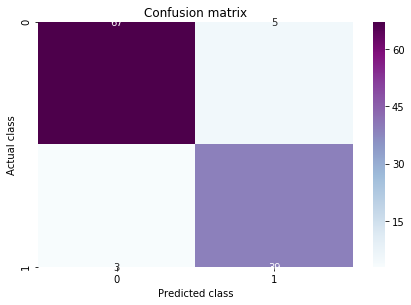

In [35]:
# making confusion matrix a heatmap

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

Predicted label 0 / actual label 0 = true negative
Predicted label 0 / actual label 1 = false negative
Predicted label 1 / actual label 1 = true positive
Predicted label 1 / actual label 0 = false positive

So this matrix is saying there are:
* 67 true negatives
* 3 false negatives
* 5 false positives
* 39 true positives

Seems pretty good...

In [36]:
# try looking at the metrics for class 1 separately
# should be the same as classification report above, just makes it easier to read
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.9298245614035088
Precision: 0.8863636363636364
Recall: 0.9285714285714286


So this is saying that the recall for malignant is 0.92. Pretty good.

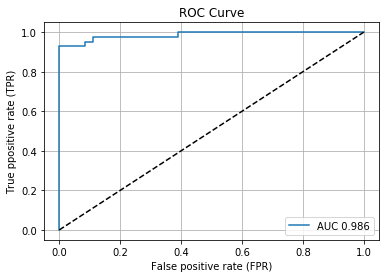

In [37]:
# attempting to plot an ROC curve

# first need to predict probability
# y_pred_proba is the predicted probability for a class in y_test dataset
# .predict_proba only gives the output of 1 in a binary classification (which is malignant, which is what we want)
# [:,1] also only gives the output for class 1
y_pred_proba = logisticRegr.predict_proba(x_test)[:,1]

# then this is plotting the ROC curve using y_test data (classes) and the predicted probability of getting class 1
# fpr is false positive rate on the x axis
# tpr is true positive rate on the y axis
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# calculating the AUC curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# plotting it on a graph

# plots x and y axes
plt.plot(fpr,tpr)
# plots legend as auc score
plt.legend(["AUC %.3f"%auc])
# plots labels / title
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True ppositive rate (TPR)")
plt.title("ROC Curve")
# adds a grid
plt.grid()
# adds the line for an AUC of 0.5, i.e. a useless classfier
plt.plot([0, 1], [0, 1], 'k--')
# shows plot
plt.show()

So to summarise

* This model has a low rate of false negatives / high recall (0.93), which is what we want for disease
* The F1 score is also pretty high for malignant (0.91), indicating there is a good balance of precision and recall (even though we are most interested in recall)
* The AUC score is 0.986 and a perfect classifer is 1

That can't be right? It's saying this is a near perfect classifier...

## Go to my other notebook!

#### Amber_model2_HPF_outliers_removed to see how removing outliers affected model performance.